# Yes Bank Stock Closing Price Prediction

## Business Context

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

## Business Objective:
The main objective is to predict the stock's closing price of the month.

In [1]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data = pd.read_csv('data_YesBank_StockPrices.csv')

# Data Inspection

In [3]:
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

Date: It denotes the month & year with respect to the price of the stock.

Open: The price at which a stock started trading that month.

High: Refers to the maximum price of the stock.

Low: Refers to the minimum price of the stock.

Close: Refers to the final trading price for that month.

"Close" is the dependent variable or the target variable in this case & rest all are independent variables or input variables.

In [5]:
#Shape of the data
data.shape

(185, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


This dataset contains 185 entries and 5 columns

# Handling Missing Values

In [7]:
#Check for null/missing values
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

This dataset contains no null values

In [8]:
#Check for duplicates
len(data[data.duplicated()])

0

There are no duplicates present in our data

In [9]:
#statistical description of the data
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [10]:
#to keep the original dataset intact, creating the copy of data
bank_data = data.copy()

In [11]:
from datetime import datetime

In [12]:
# Changing the "Date" column to datetime object.
bank_data['Date'] = pd.to_datetime(bank_data['Date'].apply(lambda x: datetime.strptime(x, '%b-%y')))

In [13]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [14]:
#Dependent and Independent features
X=bank_data.drop(['Close', 'Date'], axis=1)
y=bank_data['Close']

In [15]:
X.head()

,Open,High,Low
0,13.00,14.00,11.25
1,12.58,14.88,12.55
2,13.48,14.87,12.27
3,13.20,14.47,12.40
4,13.35,13.88,12.88


In [16]:
y.head()

0    12.46
1    13.42
2    13.30
3    12.99
4    13.41
Name: Close, dtype: float64

# EXPLORATORY DATA ANALYSIS (EDA)

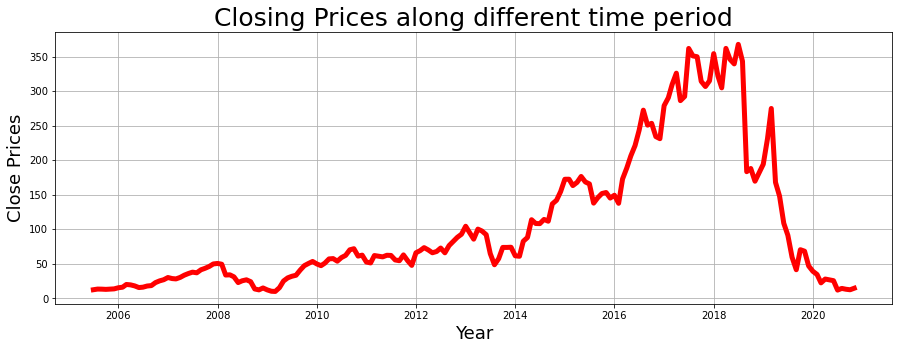

In [17]:
# Visualisation of closing price with respect to dates.
plt.figure(figsize=(15,5))
plt.xlabel('Year', fontsize=18)
plt.ylabel('Close Prices', fontsize=18)
plt.plot(bank_data['Date'], bank_data['Close'],linewidth=5,color='red')
plt.title('Closing Prices along different time period', fontsize=25)
plt.grid()
plt.show()

### 2018 onwards stock prices witnessed a downfall & the reason can be because of fraud 

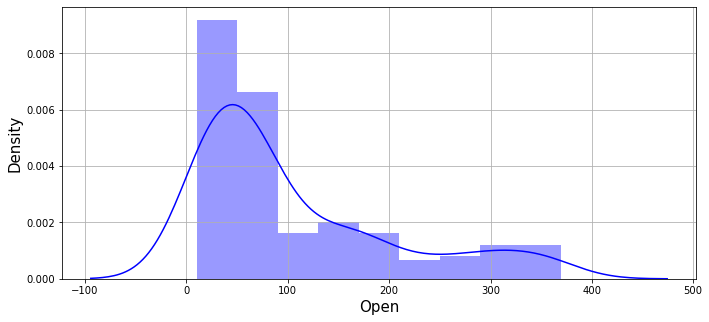

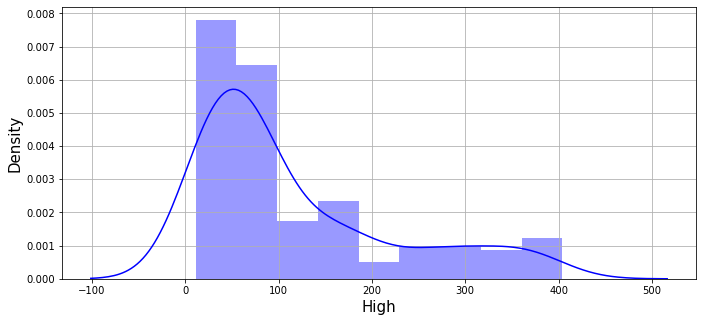

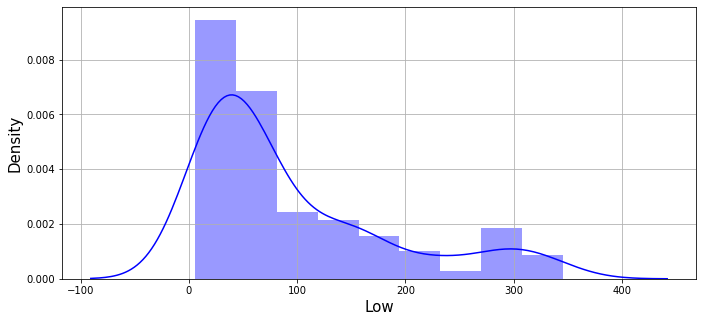

In [18]:
# Visualisation of skewness of the independent variable dataset.
for labels in X:
    plt.figure(figsize=(25,5))
    plt.subplot(1,2,2)
    fig = sns.distplot(bank_data[labels],color='blue')
    fig.set_ylabel('Density',fontsize=15)
    fig.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

### From the above distribution we can say that the independent features are positively skewed

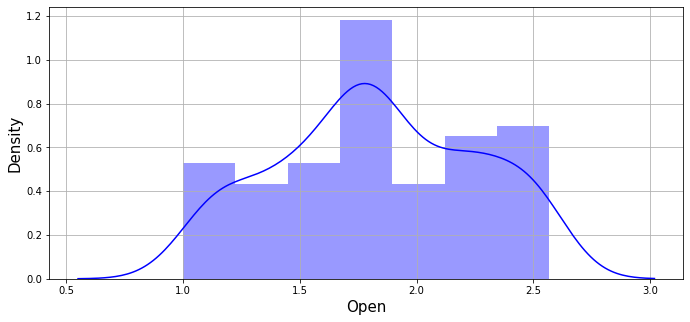

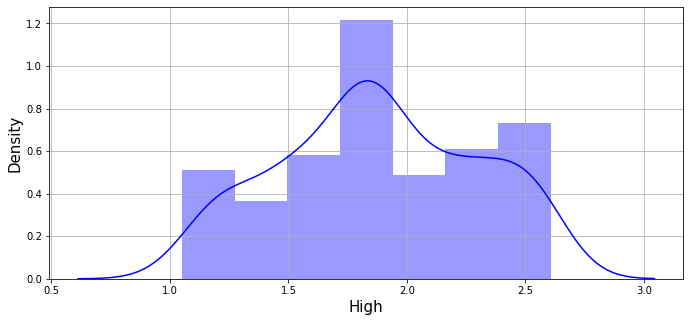

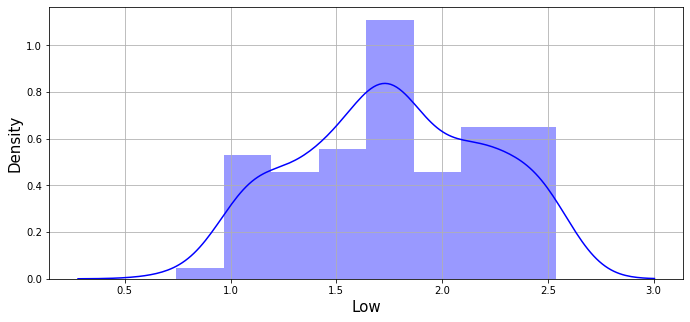

In [19]:
#In order to make input variables look like a gaussian distribution, here we are applying log transformation
#Linear regression should follow a gaussian distribution( Assumption w.r.t linear regression)

#Apply the log transformation
for labels in X:
    plt.figure(figsize=(25,5))
    plt.subplot(1,2,2)
    vis = sns.distplot(np.log10(bank_data[labels]),color='blue')
    vis.set_ylabel('Density',fontsize=15)
    vis.set_xlabel(labels,fontsize=15)
    plt.grid()
    plt.show()

#### Independent variable dataset now seems to be normally dirtributed a bit after log transformation.

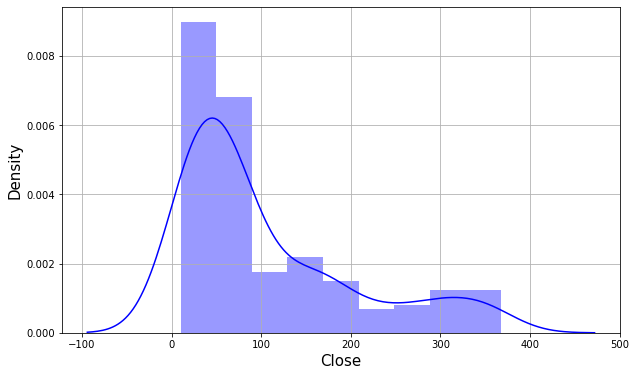

In [20]:
# Visualisation of skewness of the dependent variable dataset.
plt.figure(figsize=(10,6))
vis = sns.distplot(y,color='blue')
vis.set_ylabel('Density',fontsize=15)
vis.set_xlabel('Close',fontsize=15)
plt.grid()
plt.show()

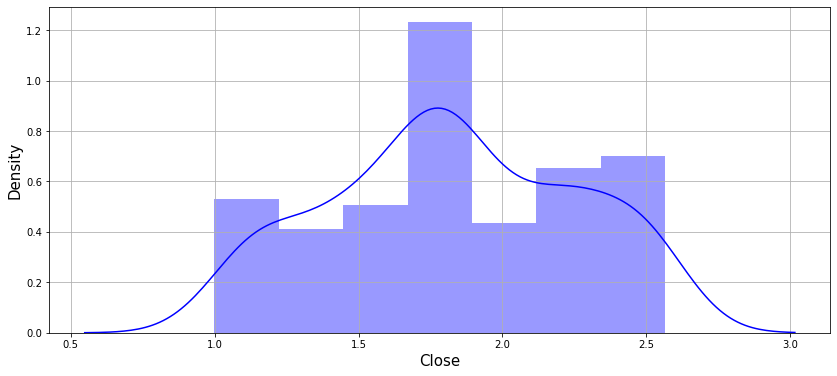

In [21]:
#Apply log transformation
# Visualisation of skewness of the dependent variable dataset.
plt.figure(figsize=(14,6))
vis = sns.distplot(np.log10(y),color='blue')
vis.set_ylabel('Density',fontsize=15)
vis.set_xlabel('Close',fontsize=15)
plt.grid()
plt.show()


<AxesSubplot:>

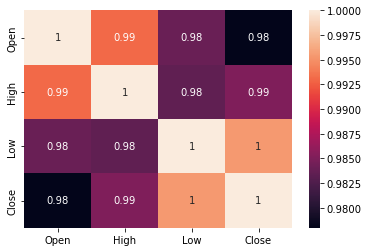

In [22]:
#Plotting correlation
sns.heatmap(data.corr(), annot=True)

## All the variables are highly correlated to each other

<AxesSubplot:xlabel='Open', ylabel='Close'>

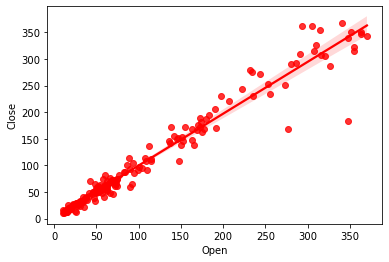

In [23]:
#Plotting regplot w.r.t "Close" and "Open"
sns.regplot(data=data, x='Open', y='Close', color='red')

<AxesSubplot:xlabel='Low', ylabel='Close'>

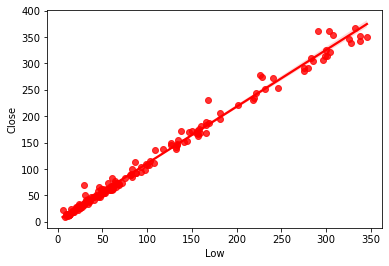

In [24]:
#Plotting regplot w.r.t "Close" and "Low"
sns.regplot(data=data, x='Low', y='Close', color='red')

<AxesSubplot:xlabel='High', ylabel='Close'>

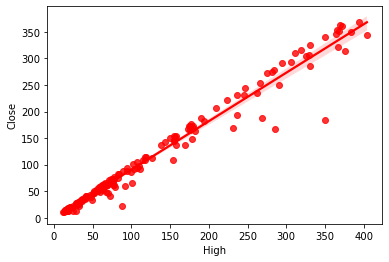

In [25]:
#Plotting regplot w.r.t "Close" and "High"
sns.regplot(data=data, x='High', y='Close', color='red')

In [26]:
# Dataframe to store metrics.
i = 0
eval_metric = pd.DataFrame()

# Train Test Split

In [27]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [28]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [29]:
X_train_scaler=scaler.fit_transform(X_train)

In [30]:
X_test=scaler.transform(X_test)

In [31]:
#Check the data shape
X_train.shape

(148, 3)

In [32]:
X_test.shape

(37, 3)

# MODEL TRAINING

# > LINEAR REGRESSION

In [33]:
#LinearRegression
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [34]:
#Fitting your train datasets to linear regression algorithm
regression.fit(X_train_scaler,y_train)

LinearRegression()

In [35]:
#Print the coefficients and intercept
print(regression.coef_)
print(regression.intercept_)

[-181.85661918  210.84639092  330.96928956]
10.217552701683147


In [36]:
#Prediction with test data
reg_pred=regression.predict(X_test)

In [37]:
reg_pred

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845,  23.11440842,  40.04131849,  60.83231474,
       166.62061583,  63.52165329,  47.4734753 , 196.91772952,
        67.07512217,  36.85762403,  15.34937858,  26.28559837,
        45.25633442,  25.26888268,  62.4263825 ,  52.3074695 ,
       180.4462878 , 153.71093779, 376.13707477,  35.9615265 ,
        19.90822916, 135.14405783,  59.90906945,  32.63530288,
        51.02426854, 146.93301779,  56.91809176,  48.68058951,
       167.37444336, 262.18882906,  52.89811131,  51.74836864,
        36.04731752])

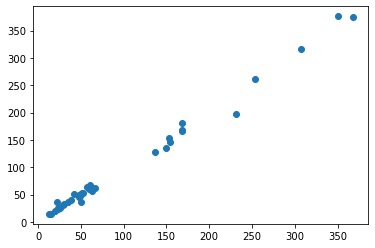

In [38]:
#Plotting a scatter plot w.r.t prediction
plt.scatter(y_test,reg_pred)

In [39]:
#Performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MAE = mean_absolute_error((y_test), (reg_pred))
print("MAE:", MAE)

MSE  = mean_squared_error((y_test), (reg_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (reg_pred))
print("R_squared :" ,R_squared)

MAE: 5.812554509942109
MSE : 86.64379126513813
RMSE : 9.308264675283903
R_squared : 0.9904142726548664


In [40]:
#display adjusted R-squared
1 - (1-R_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9895428428962179

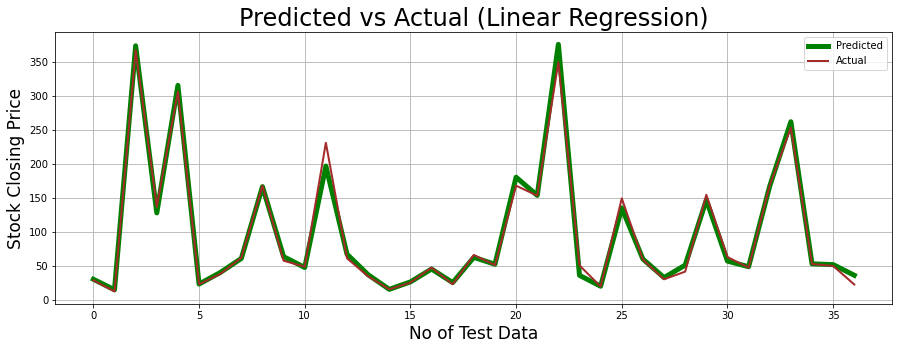

In [41]:
# Visualisation.
plt.figure(figsize=(15,5))
plt.plot(reg_pred,color='green',linewidth=5)
plt.plot(np.array(y_test),color='brown',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Linear Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred = Predicted values
# y_test = Actual values

In [42]:
# Inserting Linear Regression evaluation metrics into the dataframe.
eval_metric.loc[i,"Model_Name"]='Linear regression'
eval_metric.loc[i,"MAE"]=round(MAE,4)
eval_metric.loc[i,"MSE"]=round(MSE,4)
eval_metric.loc[i, "RMSE"]=round(RMSE,4)
eval_metric.loc[i,"R_squared"]=round(R_squared,4)

i+=1

 # > RIDGE REGRESSION 
##### (L2 REGULARIZATION)

In [43]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [44]:
# Fitting data into Ridge Regression algorithm.
ridge  = Ridge(alpha=0.1)
ridge.fit(X_train_scaler,y_train)

Ridge(alpha=0.1)

In [45]:
# Cross validation.
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regressor.fit(X_train_scaler,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [46]:
print("Best fit alpha value :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

Best fit alpha value : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -47.9758121483053


In [47]:
# Predicted values.
reg_pred_ridge = ridge_regressor.predict(X_test)
reg_pred_ridge

array([ 30.18252235,  14.69283044, 374.02190649, 127.96130608,
       315.70946845,  23.11440842,  40.04131849,  60.83231474,
       166.62061583,  63.52165329,  47.4734753 , 196.91772952,
        67.07512217,  36.85762403,  15.34937858,  26.28559837,
        45.25633442,  25.26888268,  62.4263825 ,  52.3074695 ,
       180.4462878 , 153.71093779, 376.13707477,  35.9615265 ,
        19.90822916, 135.14405783,  59.90906945,  32.63530288,
        51.02426854, 146.93301779,  56.91809176,  48.68058951,
       167.37444336, 262.18882906,  52.89811131,  51.74836864,
        36.04731752])

In [48]:
#Evaluation metrics
MAE = mean_absolute_error((y_test), (reg_pred_ridge))
print("MAE:", MAE)

MSE  = mean_squared_error((y_test), (reg_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (reg_pred_ridge))
print("R_squared :" ,R_squared)

MAE: 5.812554509942064
MSE : 86.6437912651377
RMSE : 9.308264675283878
R_squared : 0.9904142726548665


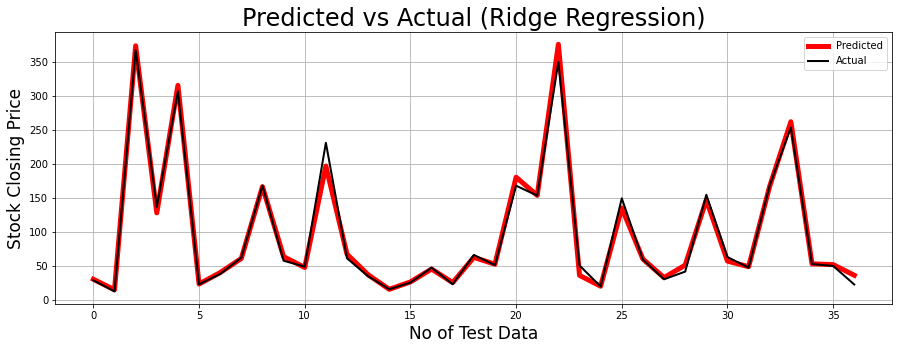

In [49]:
# Visualisation.
plt.figure(figsize=(15,5))
plt.plot(reg_pred_ridge,color='red',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Ridge Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred_ridge = Predicted values
# y_test = Actual values

In [50]:
# Inserting Ridge Regression evaluation metrics into the dataframe.
eval_metric.loc[i,"Model_Name"]='Ridge regression'
eval_metric.loc[i,"MAE"]=round(MAE,4)
eval_metric.loc[i,"MSE"]=round(MSE,4)
eval_metric.loc[i, "RMSE"]=round(RMSE,4)
eval_metric.loc[i,"R_squared"]=round(R_squared,4)

i+=1

# > LASSO REGRESSION
##### (L1 REGULARIZATION)

In [51]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001, max_iter=3000)

In [52]:
lasso.fit(X_train_scaler,y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [53]:
# Cross validation.
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train_scaler,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [54]:
print("Best fit alpha value :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

Best fit alpha value : {'alpha': 0.0001}

Using  {'alpha': 0.0001}  the negative mean squared error is:  -48.580596842964006


In [55]:
# Predicted values.
reg_pred_lasso = lasso_regressor.predict(X_test)
reg_pred_lasso

array([ 30.18339277,  14.69319753, 374.01085276, 127.95539636,
       315.7127074 ,  23.11377046,  40.04119083,  60.82952744,
       166.62167631,  63.5131587 ,  47.47651202, 196.91010324,
        67.07510939,  36.85909154,  15.34782263,  26.28502201,
        45.25435162,  25.27061119,  62.42936038,  52.3078307 ,
       180.45666798, 153.71309602, 376.1336692 ,  35.96270534,
        19.90962939, 135.14726232,  59.90842314,  32.63436128,
        51.02287448, 146.9326128 ,  56.91649027,  48.68186453,
       167.37914255, 262.19087427,  52.90094291,  51.74756308,
        36.03193087])

In [56]:
#Evaluation metrics
MAE = mean_absolute_error((y_test), (reg_pred_lasso))
print("MAE:", MAE)

MSE  = mean_squared_error((y_test), (reg_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

R_squared = r2_score((y_test), (reg_pred_lasso))
print("R_squared :" ,R_squared)

MAE: 5.8122937605576475
MSE : 86.64402051589452
RMSE : 9.308276989641774
R_squared : 0.9904142472919961


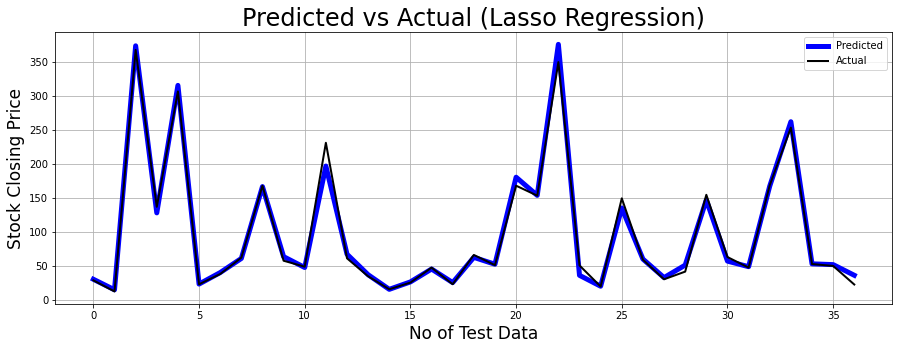

In [57]:
# Visualisation.
plt.figure(figsize=(15,5))
plt.plot(reg_pred_lasso,color='blue',linewidth=5)
plt.plot(np.array(y_test),color='black',linewidth=2)
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data',fontsize=17)
plt.ylabel('Stock Closing Price',fontsize=17)
plt.title('Predicted vs Actual (Lasso Regression)',fontsize=24)
plt.grid()
plt.show()

# reg_pred_lasso = Predicted values
# y_test = Actual values

In [58]:
# Inserting Lasso Regression evaluation metrics into the dataframe.
eval_metric.loc[i,"Model_Name"]='Lasso regression'
eval_metric.loc[i,"MAE"]=round(MAE,4)
eval_metric.loc[i,"MSE"]=round(MSE,4)
eval_metric.loc[i, "RMSE"]=round(RMSE,4)
eval_metric.loc[i,"R_squared"]=round(R_squared,4)

i+=1

####  > COMPARISON BY METRICS

In [59]:
eval_metric

,Model_Name,MAE,MSE,RMSE,R_squared
0,Linear regression,5.8126,86.6438,9.3083,0.9904
1,Ridge regression,5.8126,86.6438,9.3083,0.9904
2,Lasso regression,5.8123,86.6440,9.3083,0.9904


In [60]:
# Downloading model.
import pickle
pickle.dump(regression, open('./model.pkl', 'wb'))

# Conclusion:

1. The accuracy for each model is more than 95%
2. All the regression models have given an r2 score of around 99.04%, and with the lowest MAE,MSE and RMSE values
3. Independent variables(input variable) have a very high influence on dependent variable(target variable).